# 의사결정트기 (Decision Tree)

### 1) 설명
> 스무고개
- 머신러닝 기법 중 `지도학습`에 해당
- 의사결정 규칙을 나무 구조로 도표화하여 `분류와 예측을 수행`한다
- `분류와 회귀`에 모두 적용 가능함
- 장점: 결과가 이해하기 쉽고 직관적이다. `결과에 대한 원인 설명이 필요한 경우 많이 사용`
- 단점: 과적합 가능성이 매우 크기 때문에 `정확도가 떨어진다`.
### 2) 사용 예시
- 은행에서 대출 가능 여부 판단
- 환자가 어떠한 조건에 부합하여 병에 걸렸는가에 대한 내용

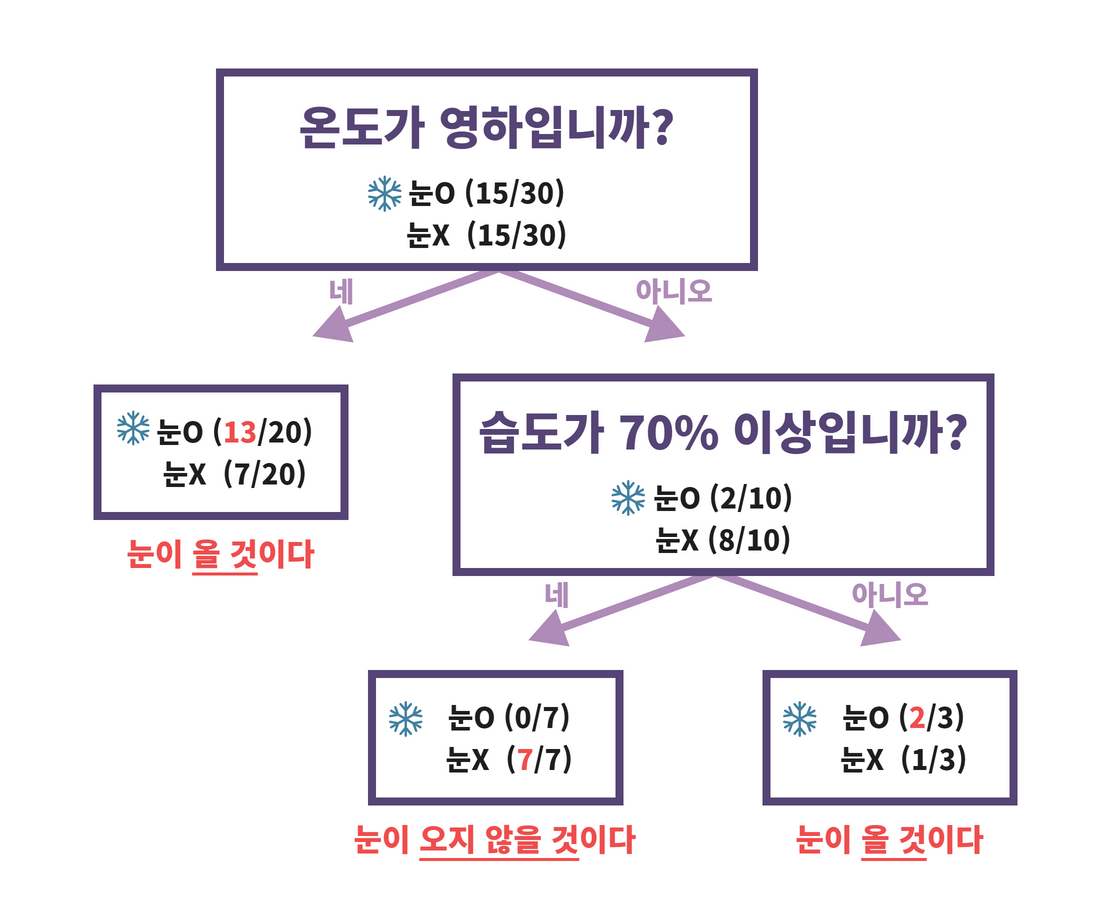

In [17]:
from IPython.display import display, Image
display(Image('image18_decisiontree.png', width=500, height=500))

### 3) 함수 설명
- `export_text()`
    - 의사결정나무를 글로 출력
- `export_graphviz()`
    - 이 함수는 내부적으로 `graphviz` 패키지에 의존하고 있기에 `graphviz`를 먼저 설치해야 한다

### 4) `graphviz` 패키지 설치
- 그래픽 시각화를 위해 `graphviz` 패키지 설치 필요
#### mac 용
- terminal에 다음과 같이 입력: 
    - 설치: `brew install graphviz` 
    - dot 경로 찾기: `which dot`    
#### windows 용
1. https://graphviz.org/download/ 페이지에서 windows 64bit installer 파일을 내려받아 설치한다.
- 설치 과정 중 Install Options 페이지에서 두 번째 항목을 선택하면 PATH 설정이 자동으로 처리된다.

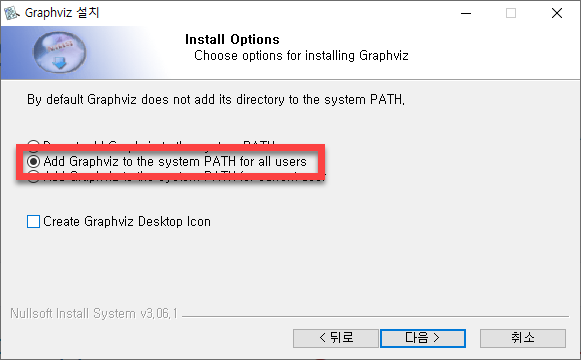

In [18]:
display(Image('image20_graphviz설치.png'))

2. 만약 설치 과정 중에 PATH 자동 설정을 수행하지 않았다면 설치 후 `C:\\ProgramFiles\\Graphviz\\bin` 경로를 시스템 환경변수 PATH에 추가

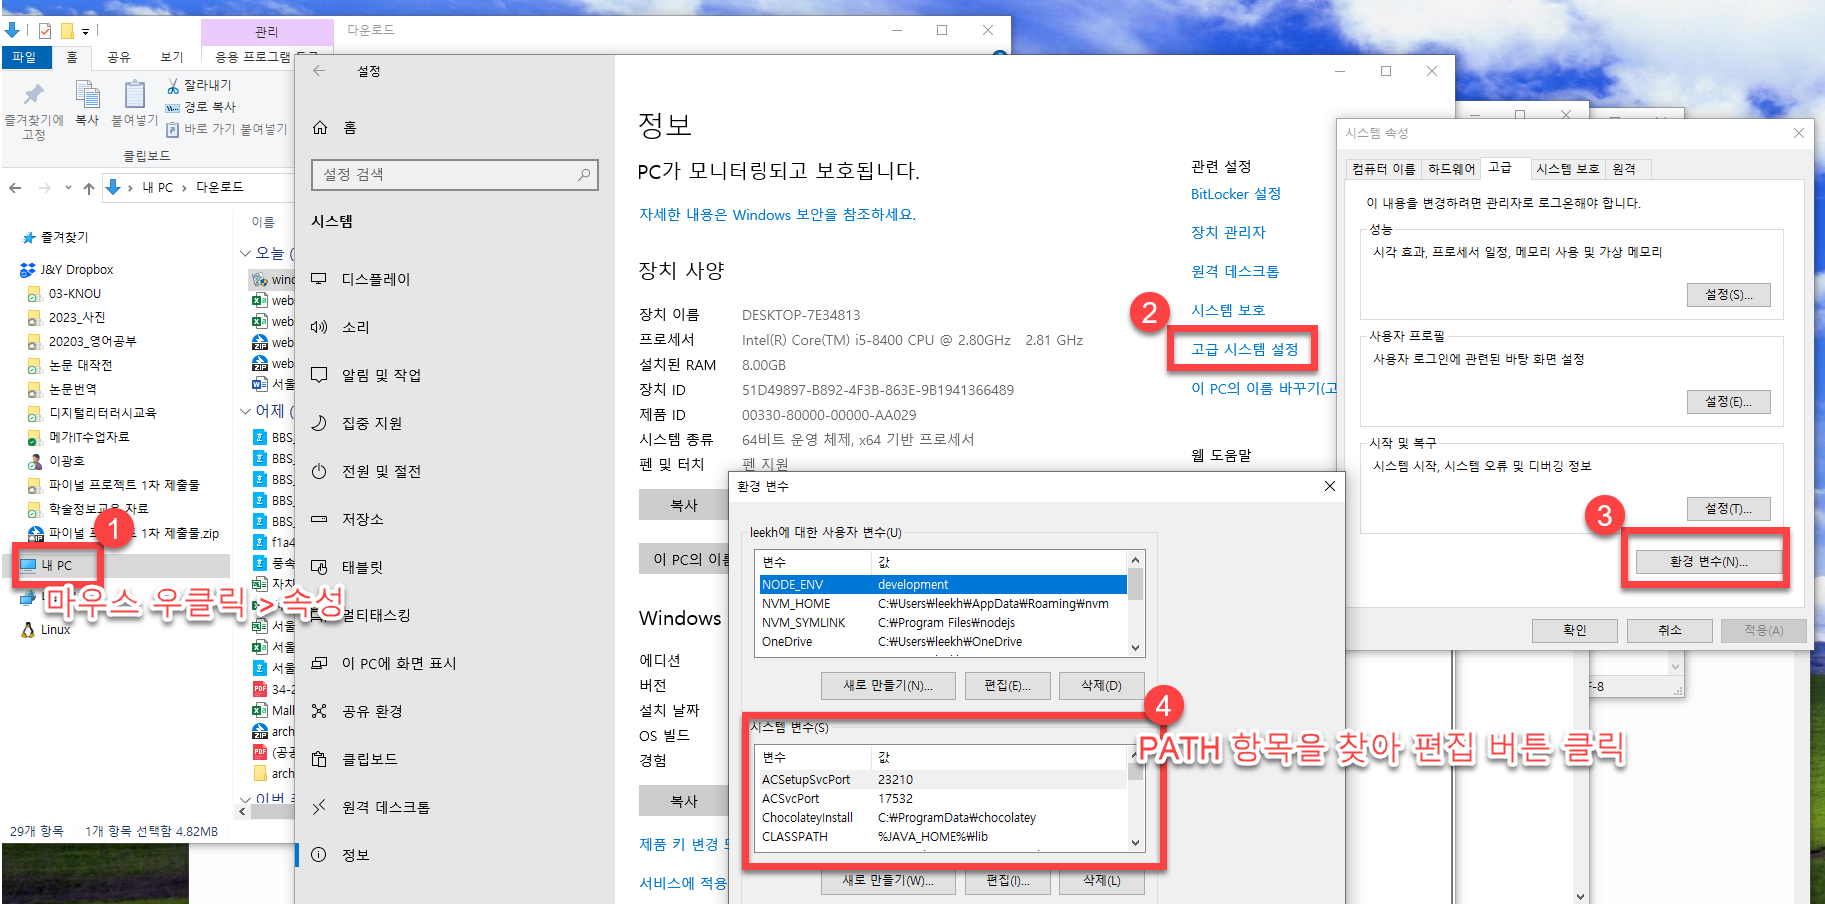

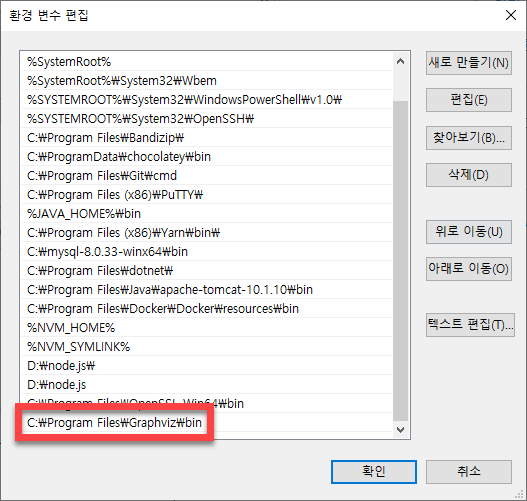

In [19]:
display(Image('image21_graphviz설치2.png'))
display(Image('image22_graphviz설치3.png'))

3. 설치가 완료되면 VSCode 재실행

## 1. 패키지 참조
- `export_graphviz()` 함수는 내부적으로 `graphviz` 패키지에 의존하고 있기에 `graphviz`를 먼저 설치해야 한다

In [20]:
from pandas import read_excel
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz, plot_tree
from subprocess import check_call
import graphviz
import dtreeviz
from plotnine import *

## 2. 데이터 가져오기

In [21]:
origin = read_excel('https://data.hossam.kr/G02/iris.xlsx')
origin

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 3. 데이터 분할 및 시각화

In [22]:
x = origin.drop('Species', axis=1)
#y = origin.filter(['Species'])
y = origin['Species'].map({'setosa': 0, 'versicolor':1, 'virginica': 2})
x.shape, y.shape

((150, 4), (150,))

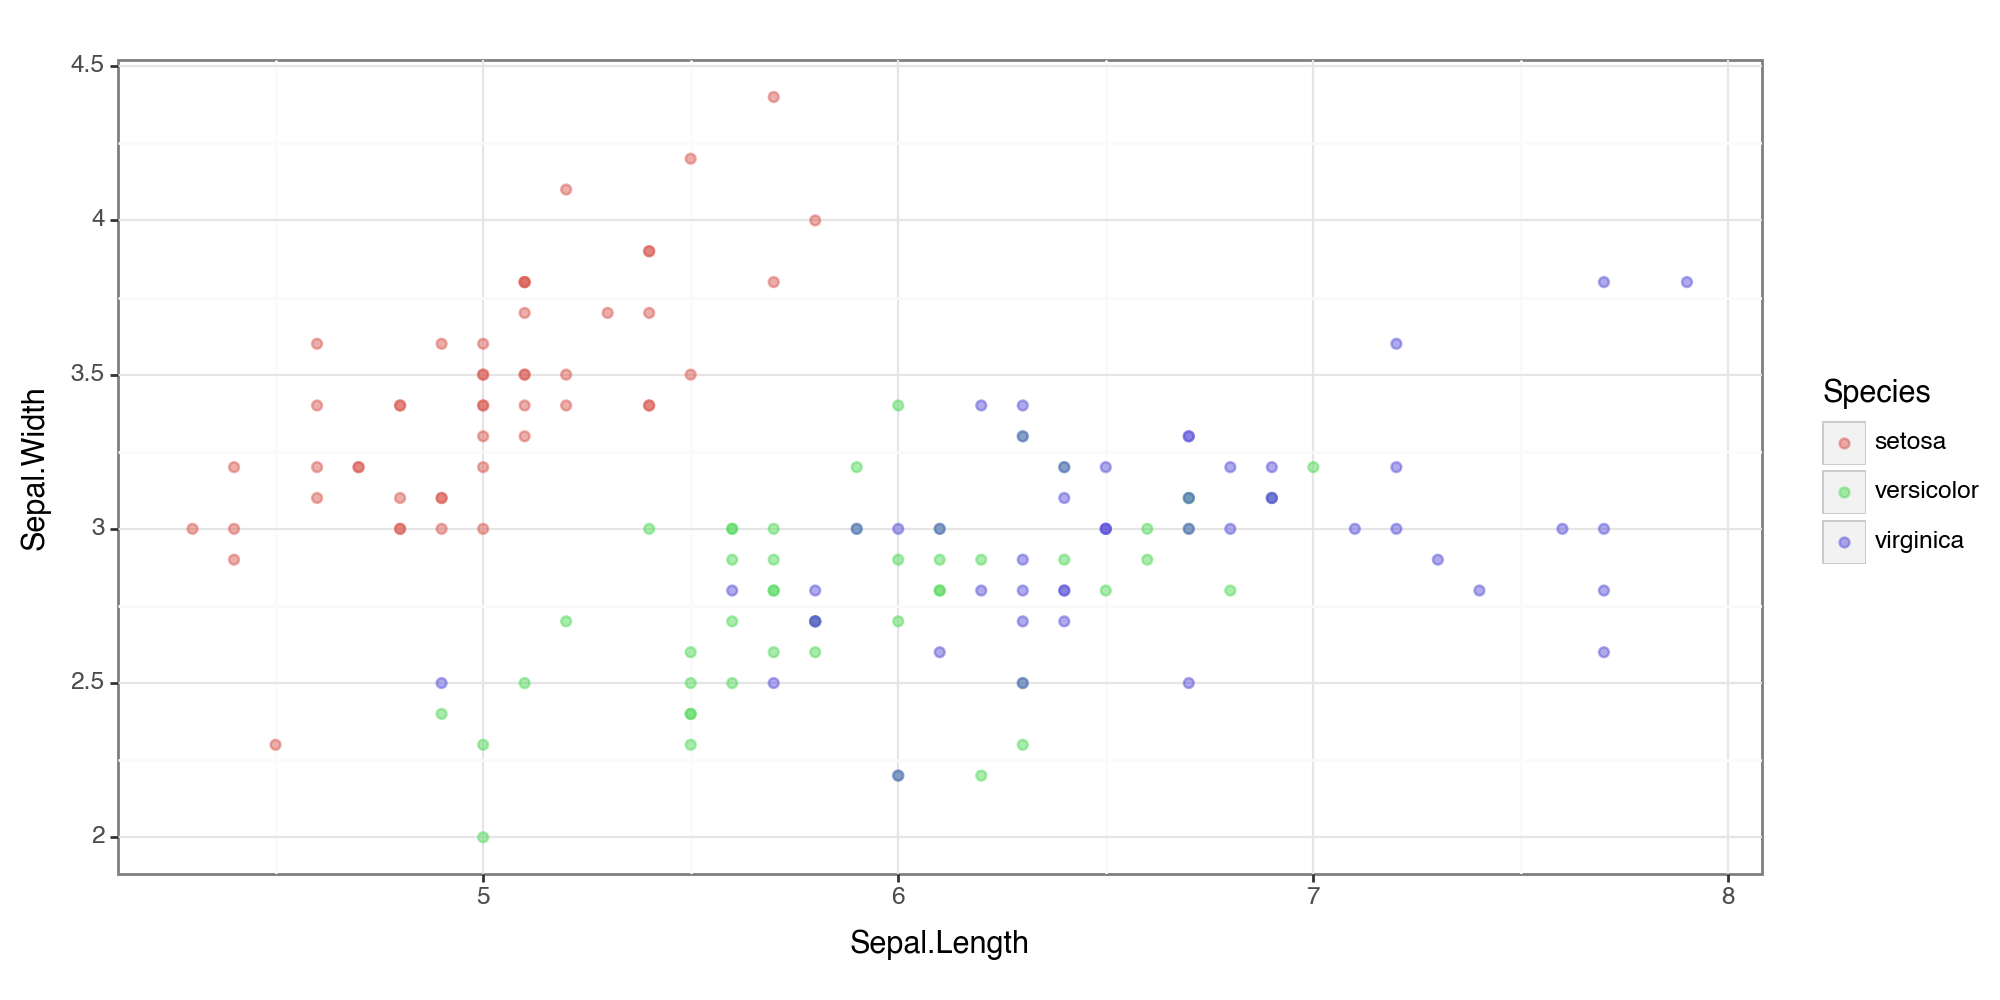

<Figure Size: (1000 x 500)>

In [32]:
ggplot(data=origin,
       mapping=aes(x='Sepal.Length',
                   y='Sepal.Width',
                   color='Species')) + geom_point(alpha=0.5) + theme_bw() + theme(figure_size=(10, 5))

## 4. 학습 모델 구현

In [24]:
dtree = DecisionTreeClassifier(random_state=777,
                               max_depth = 3) # maximum depth of the tree (기본값=None)
dtree.fit(x.values, y)

DecisionTreeClassifier(max_depth=3, random_state=777)

## 5. 의사결정나무 결과 확인
### 1) 글로 출력 `export_text()`
- 글자로 의사결정나무를 출력

In [25]:
et = export_text(dtree,
                 feature_names = list(x.columns), # 독립변수 이름들
                 class_names = ['setosa', 
                                'versicolor',
                                'virginica']) # 종속변수의 실제 이름들)
print(et)

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.75
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- class: virginica
|   |--- Petal.Width >  1.75
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica



### 2) 시각화 `export_graphviz()`
- 방법 1: out_file = `'iris.dot'`이라는 파일을 생성 및 `.png` 파일로 변환

In [26]:
export_graphviz(dtree,
                out_file='iris.dot',
                feature_names = list(x.columns),
                class_names = ['setosa', 
                                'versicolor',
                                'virginica'],
                rounded=True,               # 노드의 모서리를 둥글게
                filled=True,                # 노드의 색상을 다르게
                fontname = 'AppleGothic')   # 글꼴 설정

check_call(['dot', '-Tpng', 'iris.dot', '-o', 'iris.png'])

0

- 방법 2: out_file=`'iris.dot'`이라는 파일을 생성 및 파일 열기

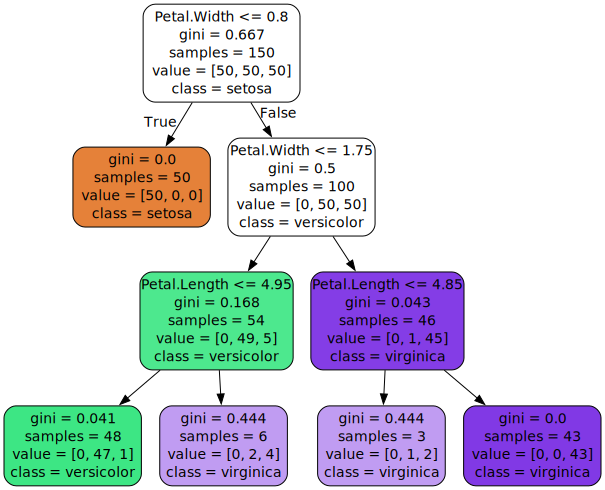

In [27]:
export_graphviz(dtree,
                out_file='iris.dot',
                feature_names = list(x.columns),
                class_names = ['setosa', 
                                'versicolor',
                                'virginica'],
                rounded=True,               # 노드의 모서리를 둥글게
                filled=True,                # 노드의 색상을 다르게
                fontname = 'AppleGothic')   # 글꼴 설정

with open('iris.dot') as f:
    dot = f.read()
    display(graphviz.Source(dot))

### 3) 시각화 `plot_tree`
- 기본 파라미터는 `export_text()` 함수와 동일
- 하지만 pyplot을 통해서 출력해야함

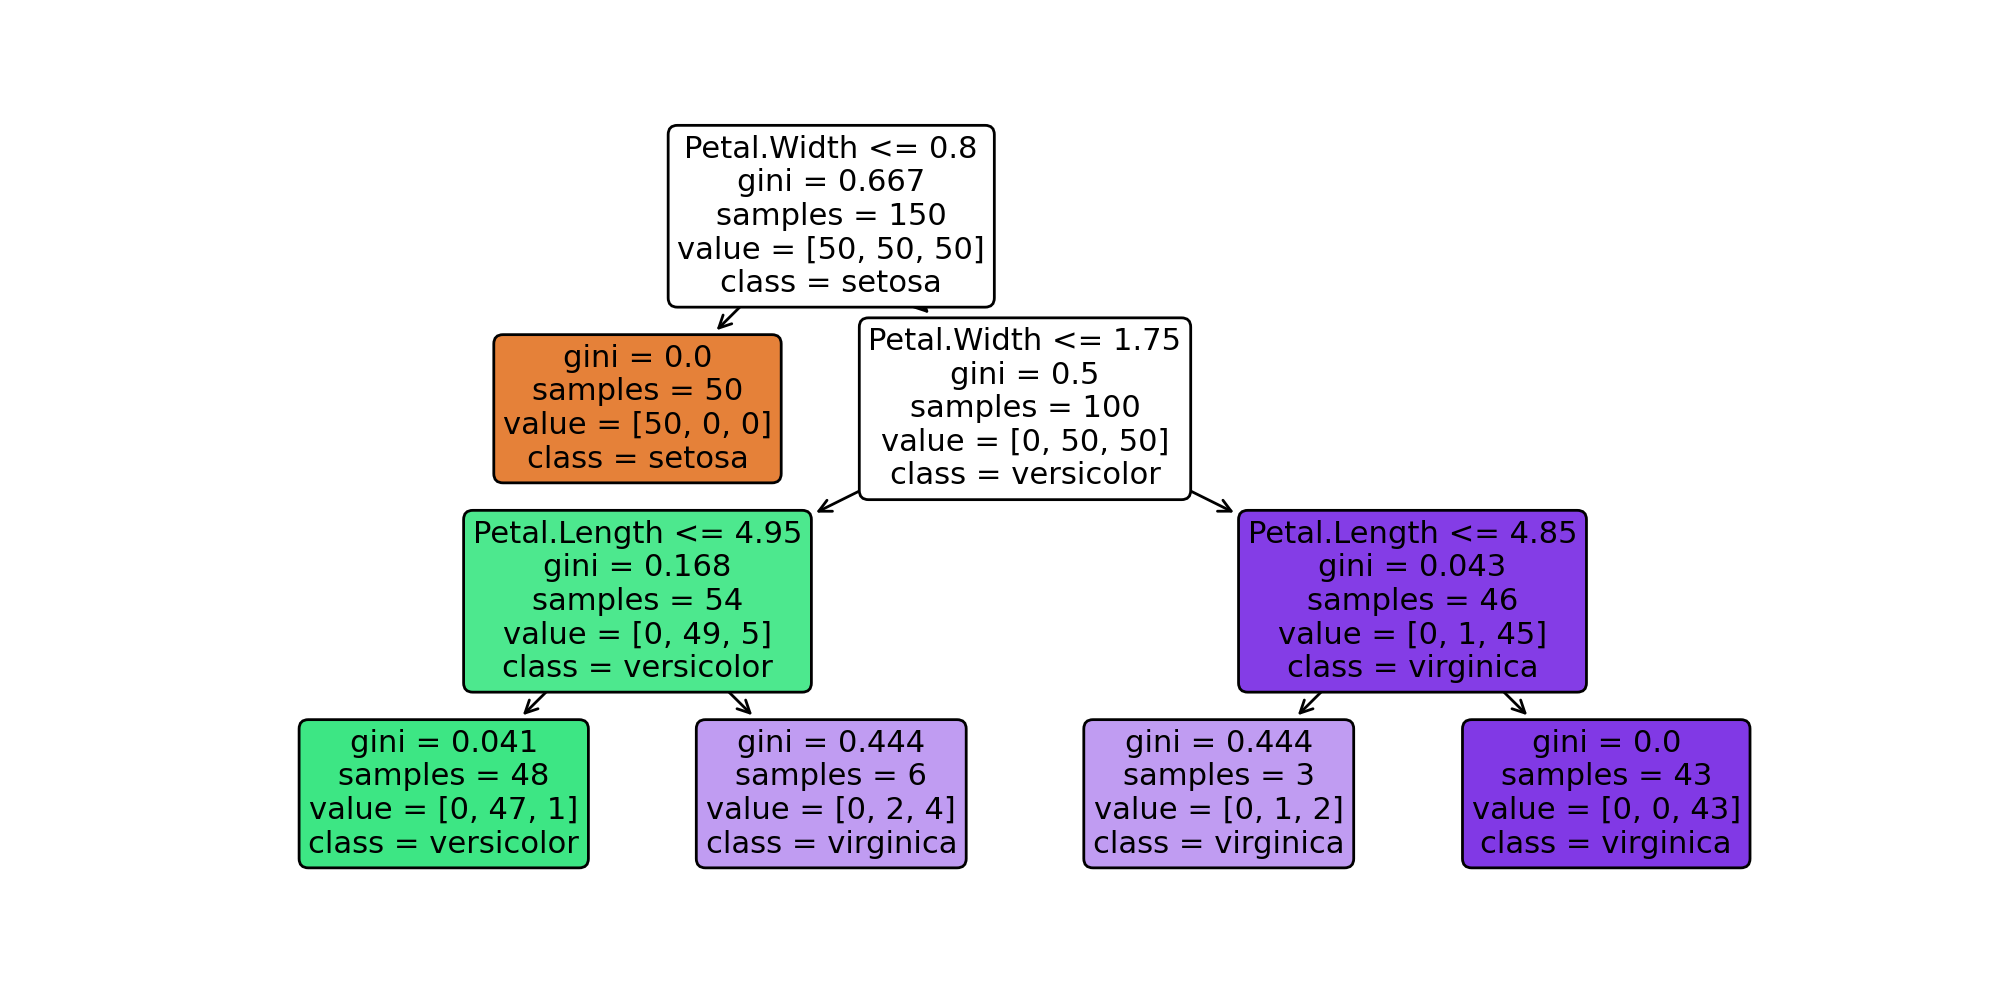

In [28]:
plt.figure(figsize=(10, 5))
# 리턴을 안 받으면 그래프가 2개 출력된다.
# 리턴값을 따로 사용할 것이 아니므로 언더바로 받는다.
_ = plot_tree(dtree,
              feature_names = list(x.columns),
              class_names = ['setosa' , 'versicolor' , 'virginica'],
              rounded=True,     # 노드의 모서리를 둥글게
              filled=True)      # 노드의 색상을 다르게
plt.show()
plt.close()

### 4) 시각화 `dtreeviz`
- `dtreeviz` 패키지의 설치와 참조가 필요하다
- 주의할 점: 종속변수 y 가 라벨링이 되어 있는 형태여야 한다.

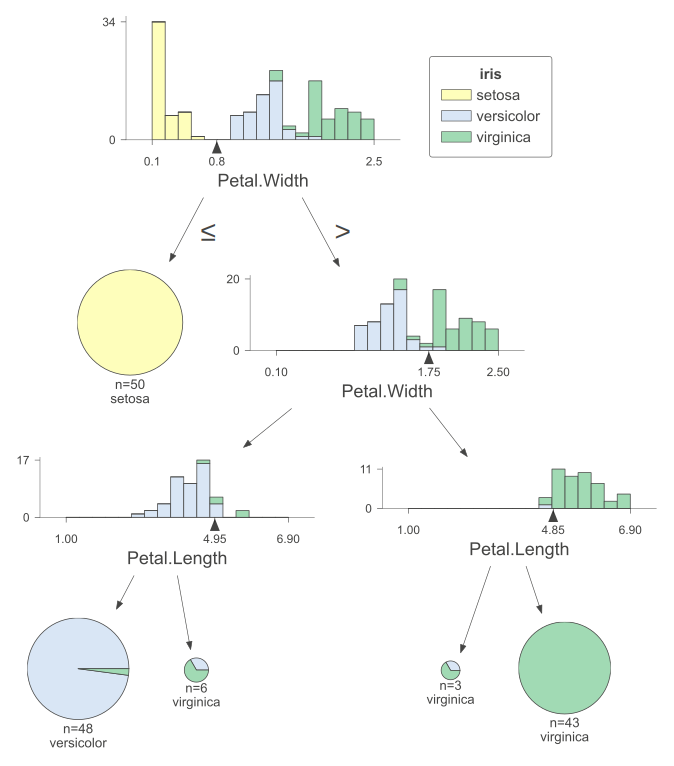

In [29]:
viz = dtreeviz.model(dtree,
                     X_train=x,
                     y_train=y,
                     target_name='iris',    # title 이름
                     feature_names=list(origin.columns[:-1]),
                     class_names=['setosa' , 'versicolor' , 'virginica'])
viz.view(scale=2.0)